In [3]:
import io
import re
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [4]:
with open("./Data_Label716.csv", 'r') as csvfile:
    print(f"First line (header) looks like this:\n\n{csvfile.readline()}")
    print(f"Each data point looks like this:\n\n{csvfile.readline()}")

First line (header) looks like this:

﻿text;label

Each data point looks like this:

@animefess_ Owi Tiga Periode (Orang Wibu Tidak Gabut, Periang, Ora Debat);Netral



In [5]:
# Loading & Preprocessing Data

def remove_stopwords(sentence):
    # List of stopwords
    a = 'ya ga gak yg tdk aja deh kalo nya sih hehe ada adalah adanya adapun agak agaknya agar akan akankah akhir akhiri akhirnya aku akulah amat amatlah anda andalah antar antara antaranya apa apaan apabila apakah apalagi apatah artinya asal asalkan atas atau ataukah ataupun awal awalnya bagai bagaikan bagaimana bagaimanakah bagaimanapun bagi bagian bahkan bahwa bahwasanya baik bakal bakalan balik banyak bapak baru bawah beberapa begini beginian beginikah beginilah begitu begitukah begitulah begitupun bekerja belakang belakangan belum belumlah benar benarkah benarlah berada berakhir berakhirlah berakhirnya berapa berapakah berapalah berapapun berarti berawal berbagai berdatangan beri berikan berikut berikutnya berjumlah berkali-kali berkata berkehendak berkeinginan berkenaan berlainan berlalu berlangsung berlebihan bermacam bermacam-macam bermaksud bermula bersama bersama-sama bersiap bersiap-siap bertanya bertanya-tanya berturut berturut-turut bertutur berujar berupa besar betul betulkah biasa biasanya bila bilakah bisa bisakah boleh bolehkah bolehlah buat bukan bukankah bukanlah bukannya bulan bung cara caranya cukup cukupkah cukuplah cuma dahulu dalam dan dapat dari daripada datang dekat demi demikian demikianlah dengan depan di dia diakhiri diakhirinya dialah diantara diantaranya diberi diberikan diberikannya dibuat dibuatnya didapat didatangkan digunakan diibaratkan diibaratkannya diingat diingatkan diinginkan dijawab dijelaskan dijelaskannya dikarenakan dikatakan dikatakannya dikerjakan diketahui diketahuinya dikira dilakukan dilalui dilihat dimaksud dimaksudkan dimaksudkannya dimaksudnya diminta dimintai dimisalkan dimulai dimulailah dimulainya dimungkinkan dini dipastikan diperbuat diperbuatnya dipergunakan diperkirakan diperlihatkan diperlukan diperlukannya dipersoalkan dipertanyakan dipunyai diri dirinya disampaikan disebut disebutkan disebutkannya disini disinilah ditambahkan ditandaskan ditanya ditanyai ditanyakan ditegaskan ditujukan ditunjuk ditunjuki ditunjukkan ditunjukkannya ditunjuknya dituturkan dituturkannya diucapkan diucapkannya diungkapkan dong dua dulu empat enggak enggaknya entah entahlah guna gunakan hal hampir hanya hanyalah hari harus haruslah harusnya hendak hendaklah hendaknya hingga ia ialah ibarat ibaratkan ibaratnya ibu ikut ingat ingat-ingat ingin inginkah inginkan ini inikah inilah itu itukah itulah jadi jadilah jadinya jangan jangankan janganlah jauh jawab jawaban jawabnya jelas jelaskan jelaslah jelasnya jika jikalau juga jumlah jumlahnya justru kala kalau kalaulah kalaupun kalian kami kamilah kamu kamulah kan kapan kapankah kapanpun karena karenanya kasus kata katakan katakanlah katanya ke keadaan kebetulan kecil kedua keduanya keinginan kelamaan kelihatan kelihatannya kelima keluar kembali kemudian kemungkinan kemungkinannya kenapa kepada kepadanya kesampaian keseluruhan keseluruhannya keterlaluan ketika khususnya kini kinilah kira kira-kira kiranya kita kitalah kok kurang lagi lagian lah lain lainnya lalu lama lamanya lanjut lanjutnya lebih lewat lima luar macam maka makanya makin malah malahan mampu mampukah mana manakala manalagi masa masalah masalahnya masih masihkah masing masing-masing mau maupun melainkan melakukan melalui melihat melihatnya memang memastikan memberi memberikan membuat memerlukan memihak meminta memintakan memisalkan memperbuat mempergunakan memperkirakan memperlihatkan mempersiapkan mempersoalkan mempertanyakan mempunyai memulai memungkinkan menaiki menambahkan menandaskan menanti menanti-nanti menantikan menanya menanyai menanyakan mendapat mendapatkan mendatang mendatangi mendatangkan menegaskan mengakhiri mengapa mengatakan mengatakannya mengenai mengerjakan mengetahui menggunakan menghendaki mengibaratkan mengibaratkannya mengingat mengingatkan menginginkan mengira mengucapkan mengucapkannya mengungkapkan menjadi menjawab menjelaskan menuju menunjuk menunjuki menunjukkan menunjuknya menurut menuturkan menyampaikan menyangkut menyatakan menyebutkan menyeluruh menyiapkan merasa mereka merekalah merupakan meski meskipun meyakini meyakinkan minta mirip misal misalkan misalnya mula mulai mulailah mulanya mungkin mungkinkah nah naik namun nanti nantinya nyaris nyatanya oleh olehnya pada padahal padanya pak paling panjang pantas para pasti pastilah penting pentingnya per percuma perlu perlukah perlunya pernah persoalan pertama pertama-tama pertanyaan pertanyakan pihak pihaknya pukul pula pun punya rasa rasanya rata rupanya saat saatnya saja sajalah saling sama sama-sama sambil sampai sampai-sampai sampaikan sana sangat sangatlah satu saya sayalah se sebab sebabnya sebagai sebagaimana sebagainya sebagian sebaik sebaik-baiknya sebaiknya sebaliknya sebanyak sebegini sebegitu sebelum sebelumnya sebenarnya seberapa sebesar sebetulnya sebisanya sebuah sebut sebutlah sebutnya secara secukupnya sedang sedangkan sedemikian sedikit sedikitnya seenaknya segala segalanya segera seharusnya sehingga seingat sejak sejauh sejenak sejumlah sekadar sekadarnya sekali sekali-kali sekalian sekaligus sekalipun sekarang sekarang sekecil seketika sekiranya sekitar sekitarnya sekurang-kurangnya sekurangnya sela selain selaku selalu selama selama-lamanya selamanya selanjutnya seluruh seluruhnya semacam semakin semampu semampunya semasa semasih semata semata-mata semaunya sementara semisal semisalnya sempat semua semuanya semula sendiri sendirian sendirinya seolah seolah-olah seorang sepanjang sepantasnya sepantasnyalah seperlunya seperti sepertinya sepihak sering seringnya serta serupa sesaat sesama sesampai sesegera sesekali seseorang sesuatu sesuatunya sesudah sesudahnya setelah setempat setengah seterusnya setiap setiba setibanya setidak-tidaknya setidaknya setinggi seusai sewaktu siap siapa siapakah siapapun sini sinilah soal soalnya suatu sudah sudahkah sudahlah supaya tadi tadinya tahu tahun tak tambah tambahnya tampak tampaknya tandas tandasnya tanpa tanya tanyakan tanyanya tapi tegas tegasnya telah tempat tengah tentang tentu tentulah tentunya tepat terakhir terasa terbanyak terdahulu terdapat terdiri terhadap terhadapnya teringat teringat-ingat terjadi terjadilah terjadinya terkira terlalu terlebih terlihat termasuk ternyata tersampaikan tersebut tersebutlah tertentu tertuju terus terutama tetap tetapi tiap tiba tiba-tiba tidak tidakkah tidaklah tiga tinggi toh tunjuk turut tutur tuturnya ucap ucapnya ujar ujarnya umum umumnya ungkap ungkapnya untuk usah usai waduh wah wahai waktu waktunya walau walaupun wong yaitu yakin yakni yang'
    stopwords = a.split()
    
    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

def remove_emojis(sentence):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', sentence)

def parse_data_from_file(filename):
    sentences = []
    labels = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        next(reader)
        for row in reader:
            labels.append(row[1])
            sentence = row[0]
            sentence = remove_stopwords(sentence)
            sentence = remove_emojis(sentence)
            sentences.append(sentence)

    return sentences, labels

In [6]:
# Test the functions
sentences, labels = parse_data_from_file("./Data_Label716.csv")

print(f"There are {len(sentences)} sentences in the dataset.\n")
print(f"First sentence has {len(sentences[0].split())} words (after removing stopwords).\n")
print(f"There are {len(labels)} labels in the dataset.\n")
print(f"The first 5 labels are {labels[:5]}")

There are 716 sentences in the dataset.

First sentence has 9 words (after removing stopwords).

There are 716 labels in the dataset.

The first 5 labels are ['Netral', 'Positif', 'Netral', 'Negatif', 'Negatif']


In [7]:
# to remove duplicated from list labels
result = [] 
[result.append(x) for x in labels if x not in result] 

# printing list labels after removal 
print ("The list after removing duplicates: " + str(result)) 

The list after removing duplicates: ['Netral', 'Positif', 'Negatif']


In [8]:
# Defining useful global variables
NUM_WORDS = 1000
EMBEDDING_DIM = 6
MAXLEN = 18
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

In [9]:
## Training & Validation Spli ##

def train_val_split(sentences, labels, training_split):
    
    # Compute the number of sentences that will be used for training (should be an integer)
    train_size = int(len(sentences) * training_split)

    # Split the sentences and labels into train/validation splits
    train_sentences = sentences[:train_size]
    train_labels = labels[:train_size]

    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]
    
    return train_sentences, validation_sentences, train_labels, validation_labels

In [10]:
# Test your function
train_sentences, val_sentences, train_labels, val_labels = train_val_split(sentences, labels, TRAINING_SPLIT)

print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 572 sentences for training.

There are 572 labels for training.

There are 144 sentences for validation.

There are 144 labels for validation.


In [11]:
## Tokenization - Sequence & Padding ##

def fit_tokenizer(train_sentences, num_words, oov_token):
        
    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer = Tokenizer(num_words, oov_token=oov_token)
    
    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(train_sentences)    
    
    return tokenizer

In [12]:
# Test your function
tokenizer = fit_tokenizer(train_sentences, NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 2128 words

<OOV> token included in vocabulary


In [13]:
word_index

{'<OOV>': 1,
 'periode': 2,
 '3': 3,
 'jokowi': 4,
 'presiden': 5,
 'sasasayatusa': 6,
 'pemilu': 7,
 'dukung': 8,
 'cnnindonesia': 9,
 'udah': 10,
 'gagal': 11,
 'kompastv': 12,
 'big': 13,
 'jabatan': 14,
 'msaid': 15,
 'didu': 16,
 'lbp': 17,
 '2': 18,
 'dusta': 19,
 'opung': 20,
 'tolak': 21,
 'mahasiswa': 22,
 'henrysubiakto': 23,
 'sampe': 24,
 'demo': 25,
 'ya': 26,
 '2024': 27,
 'pksejahtera': 28,
 'biar': 29,
 'dennysiregar7': 30,
 'bikin': 31,
 'id': 32,
 'prize': 33,
 'orang': 34,
 'menolak': 35,
 'wacana': 36,
 'penundaan': 37,
 'klo': 38,
 'detikcom': 39,
 'salam': 40,
 'nambah': 41,
 'alextham878': 42,
 'denny': 43,
 'siregar': 44,
 'memfitnah': 45,
 'puasa': 46,
 'diciduk': 47,
 'rakyat': 48,
 'goreng': 49,
 'democrazymedia': 50,
 'pengen': 51,
 'aniesbaswedan': 52,
 'keuangannews': 53,
 '1': 54,
 'si': 55,
 'semoga': 56,
 'indonesia': 57,
 'gua': 58,
 'minyak': 59,
 'partai': 60,
 'berkuasa': 61,
 'geloraco': 62,
 'gitu': 63,
 'gimana': 64,
 'sawit': 65,
 'vivacoid': 66

In [14]:
#seq_and_pad
def seq_and_pad(sentences, tokenizer, padding, maxlen):
       
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)
    
    # Pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences, padding=padding, maxlen=maxlen)
    
    return padded_sequences

In [15]:
# Test your function
train_padded_seq = seq_and_pad(train_sentences, tokenizer, PADDING, MAXLEN)
val_padded_seq = seq_and_pad(val_sentences, tokenizer, PADDING, MAXLEN)

print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

Padded training sequences have shape: (572, 18)

Padded validation sequences have shape: (144, 18)


In [16]:
print(f"Padded training sequences:\n {train_padded_seq}\n")
print(f"Padded validation sequences:\n {val_padded_seq}")

Padded training sequences:
 [[551 552   2 ...   0   0   0]
 [ 68   2  99 ...   0   0   0]
 [  6 562  14 ...   0   0   0]
 ...
 [  1   1   1 ...   0   0   0]
 [ 28  98   1 ...   0   0   0]
 [ 68   1   3 ...   0   0   0]]

Padded validation sequences:
 [[ 28   1 220 ...   0   0   0]
 [  1   1   3 ...   0   0   0]
 [541   1   1 ...   0   0   0]
 ...
 [ 28 907   1 ...   0   0   0]
 [ 39   3   2 ...   0   0   0]
 [ 28   1 158 ...  49 327 231]]


In [17]:
# tokenize_labels

def tokenize_labels(all_labels, split_labels):
    
    # Instantiate the Tokenizer (no additional arguments needed)
    label_tokenizer = Tokenizer()
    
    # Fit the tokenizer on all the labels
    label_tokenizer.fit_on_texts(all_labels)
    
    # Convert labels to sequences
    label_seq = label_tokenizer.texts_to_sequences(split_labels)
    
    # Convert sequences to a numpy array. Don't forget to substact 1 from every entry in the array!
    label_seq_np = np.array(label_seq) - 1
    
    return label_seq_np

In [18]:
# Test your function
train_label_seq = tokenize_labels(labels, train_labels)
val_label_seq = tokenize_labels(labels, val_labels)

print(f"First 5 labels of the training set should look like this:\n{train_label_seq[:5]}\n")
print(f"First 5 labels of the validation set should look like this:\n{val_label_seq[:5]}\n")
print(f"Tokenized labels of the training set have shape: {train_label_seq.shape}\n")
print(f"Tokenized labels of the validation set have shape: {val_label_seq.shape}\n")

First 5 labels of the training set should look like this:
[[1]
 [2]
 [1]
 [0]
 [0]]

First 5 labels of the validation set should look like this:
[[0]
 [1]
 [1]
 [1]
 [2]]

Tokenized labels of the training set have shape: (572, 1)

Tokenized labels of the validation set have shape: (144, 1)



In [19]:
print(f"The first 5 train labels are {train_labels[:5]}\n")
print(f"The first 5 validation labels are {val_labels[:5]}\n")

# count number of each label in the data
res = {}

for i in labels:
    res[i] = labels.count(i)
    
print(f"the number of each label in the data:\n {res}")

The first 5 train labels are ['Netral', 'Positif', 'Netral', 'Negatif', 'Negatif']

The first 5 validation labels are ['Negatif', 'Netral', 'Netral', 'Netral', 'Positif']

the number of each label in the data:
 {'Netral': 280, 'Positif': 146, 'Negatif': 290}


In [20]:
print(train_sentences[10])
print(train_padded_seq[10])

@ranisor @jokowi kawal dilangan hembus hembuskan periode
[583   4 297 584 585 193   2   0   0   0   0   0   0   0   0   0   0   0]


In [21]:
## Create Model for Text Classification
def create_model(num_words, embedding_dim, maxlen):
    
    # tf.random.set_seed(123)
    
    ### START CODE HERE
    
    model = tf.keras.Sequential([
       # This is how you need to set the Embedding layer when using pre-trained embeddings
        tf.keras.layers.Embedding(num_words+1, embedding_dim, input_length=maxlen, trainable=False),
        # tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv1D(64, 5, activation='relu'),
        # tf.keras.layers.MaxPooling1D(),
        tf.keras.layers.LSTM(64),        

#         tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='sigmoid')
    ])
    
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']) 

    ### END CODE HERE

    return model


In [22]:
model = create_model(NUM_WORDS, EMBEDDING_DIM, MAXLEN)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 6)             6006      
                                                                 
 conv1d (Conv1D)             (None, 14, 64)            1984      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 43,193
Trainable params: 37,187
Non-trainable params: 6,006
_________________________________________________________________


In [23]:
history = model.fit(train_padded_seq, train_label_seq, epochs=10, validation_data=(val_padded_seq, val_label_seq))

Epoch 1/10


Error: Canceled future for execute_request message before replies were done

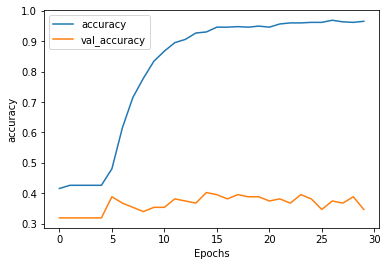

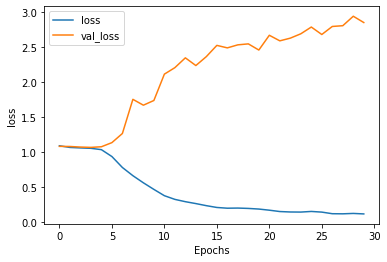

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
predictions = model.predict(train_padded_seq)

In [ ]:
print(train_sentences[1])

print(train_labels[1])
print(train_label_seq[1])
print(predictions[1])

@alisyarief periode dah yuk rame2 mk gugat uu pemilu...gasss
Positif
[2]
[6.8480289e-04 3.8838857e-03 9.9543130e-01]


In [ ]:
print(len(val_padded_seq))
print(len(val_label_seq))

144
144


In [ ]:
scores = []
score = model.evaluate(val_padded_seq, val_label_seq, verbose = 1)

akurasi = score[1]
scores.append(akurasi)
y_pred = model.predict(val_padded_seq)
y_pred = y_pred.argmax(axis=1)
cm = confusion_matrix(val_label_seq, y_pred)

print(cm)
print(classification_report(val_label_seq,y_pred))

def Average(lst):
 return sum(lst) / len(lst)

print(Average(scores))


5/5 [==============================] - 0s 7ms/step - loss: 2.8527 - accuracy: 0.3472
[[10 22 14]
 [26 29 15]
 [ 5 12 11]]
              precision    recall  f1-score   support

           0       0.24      0.22      0.23        46
           1       0.46      0.41      0.44        70
           2       0.28      0.39      0.32        28

    accuracy                           0.35       144
   macro avg       0.33      0.34      0.33       144
weighted avg       0.36      0.35      0.35       144

0.3472222089767456
